# Generalized Log-Normal Chain-Ladder

In this vignette, we loosely replicate the empirical applications in [Kuang and Nielsen (2018)](http://arxiv.org/abs/1806.05939).

First, we load the package

In [1]:
import apc

In [2]:
# Turn off future warnings
import warnings
warnings.simplefilter('ignore', FutureWarning)

Next, we convince us that we have the right data. These come with the package.

In [3]:
apc.loss_KN()

Age,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Cohort,,,,,,,,,,,,,,,,,,,,
1997,2185,13908.0,44704.0,56445.0,67313.0,62830.0,72619.0,42511.0,32246.0,51257.0,11774.0,21726.0,10926.0,4763.0,3580.0,4777.0,1070.0,1807.0,824.0,1288.0
1998,3004,17478.0,49564.0,55090.0,75119.0,66759.0,76212.0,62311.0,31510.0,15483.0,23970.0,8321.0,15027.0,3247.0,8756.0,14364.0,3967.0,3858.0,4643.0,NaN
1999,5690,28971.0,55352.0,63830.0,71528.0,73549.0,72159.0,37275.0,38797.0,27264.0,28651.0,14102.0,8061.0,17292.0,10850.0,10732.0,4611.0,4608.0,NaN,NaN
2000,9035,29666.0,47086.0,41100.0,58533.0,80538.0,70521.0,40192.0,27613.0,13791.0,17738.0,20259.0,12123.0,6473.0,3922.0,3825.0,3082.0,NaN,NaN,NaN
2001,7924,38961.0,41069.0,64760.0,64069.0,61135.0,62109.0,52702.0,36100.0,18648.0,32572.0,17751.0,18347.0,10895.0,2974.0,5828.0,NaN,NaN,NaN,NaN
2002,7285,25867.0,44375.0,58199.0,61245.0,48661.0,57238.0,29667.0,34557.0,8560.0,12604.0,8683.0,9660.0,4687.0,1889.0,NaN,NaN,NaN,NaN,NaN
2003,3017,22966.0,62909.0,54143.0,72216.0,58050.0,29522.0,25245.0,19974.0,16039.0,8083.0,9594.0,3291.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN
2004,1752,25338.0,56419.0,75381.0,64677.0,58121.0,38339.0,21342.0,14446.0,13459.0,6364.0,6326.0,6185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,1181,24571.0,66321.0,65515.0,62151.0,43727.0,29785.0,23981.0,12365.0,12704.0,12451.0,8272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we set-up a model and attach the data to it. ``data_from_df`` automatically formats the data to vector form, adding the missing period (calendar year) time-scale automatically. By setting ``time_adjust = 1`` we make sure that the most recent period matches the most recent cohort. The relationship is given by
$$ \underbrace{\text{Period}}_{\text{Calendar Year}} = \underbrace{\text{Cohort}}_{\text{Accident Year}} + \underbrace{\text{Age}}_{\text{Development Year}} - \texttt{time_adjust}. $$

In [4]:
model = apc.Model()
model.data_from_df(apc.loss_KN(), data_format='CL', time_adjust=1)

## Inference and estimation

Now, we can consider a deviance table. We limit our attention to the same three nested parametrizations mentioned in the paper:
* APC: age-period-cohort or extended chain-ladder predictor
* AC: age-cohort or chain-ladder predictor
* Ad: age-drift or chain-ladder with linear accident year effect

*Remark:
The nesting is nicely illustrated in the following figure, taken from [Nielsen (2014, Figure 5)](http://www.nuffield.ox.ac.uk/economics/papers/2014/apc_deviance.pdf):*

<img src="https://user-images.githubusercontent.com/25103918/42902938-3fc5c6bc-8a9e-11e8-94b6-7406f9a42c29.png" alt="Nested Sub-Models" width="400"/>

*Nielsen (2014) also discusses the individual sub-models and provides their specific parameterizations.*

In [5]:
model.fit_table('gen_log_normal_response')
model.deviance_table.loc[['APC', 'AC', 'Ad']]

,-2logL,df_resid,LR_vs_APC,df_vs_APC,F_vs_APC,P>F,aic
APC,170.003,153,NaN,NaN,NaN,NaN,284.003
AC,179.873,171,9.86921,18,0.409004,0.984481,257.873
Ad,258.57,189,88.567,36,2.22965,0.000410849,300.57


Just as in Table 4.1 ijn the paper, we can see that we cannot reject the hypothesis
$$ H: \text{AC vs APC} $$
which yields a p-value of 0.984 based on an F-test. Thus, we cannot reject the age-cohort model without calendar effect. In contrast, the hypothesis
$$ H: \text{Ad vs APC} $$
is clearly rejected with a near zero p-value.

The result is similar if we instead test the age-drift model against an age-cohort model:
$$ H: \text{Ad vs AC} $$

In [6]:
model.fit_table('gen_log_normal_response', 'AC')
model.deviance_table.loc[['AC', 'Ad']]

,-2logL,df_resid,LR_vs_AC,df_vs_AC,F_vs_AC,P>F,aic
AC,179.873,171,NaN,NaN,NaN,NaN,257.873
Ad,258.57,189,78.6978,18,4.31898,1.46713e-07,300.57


This hypothesis is rejected as well with a p-value near zero.

Dropping the apparently unimportant period effect, we now fit an age-cohort / chain-ladder model to the data.

In [7]:
model.fit('gen_log_normal_response', 'AC')

We take a look at the parameter estimates. In the paper, estimates are shown in first differences for the age (development year) and cohort (accident year) parameter. Here, we show estimates in second differences.

In [8]:
model.rss

28.955696532974024

In [9]:
model.s2

0.16933155867236271

In [10]:
model.parameters

,coef,std_err,t,P>|t|
level,7.660055,0.137795,55.590166,0.000000e+00
slope_age,2.272100,0.133508,17.018464,0.000000e+00
slope_coh,0.288756,0.133508,2.162837,3.194254e-02
dd_age_3,-1.339570,0.232843,-5.753106,3.959201e-08
dd_age_4,-0.696924,0.238609,-2.920783,3.962791e-03
dd_age_5,-0.146720,0.245303,-0.598117,5.505529e-01
dd_age_6,-0.264931,0.252743,-1.048222,2.960156e-01
dd_age_7,0.031599,0.260977,0.121079,9.037705e-01
dd_age_8,-0.283163,0.270115,-1.048307,2.959768e-01
dd_age_9,0.127081,0.280315,0.453350,6.508714e-01


## Distribution forecasting

Next, we take a look at distribution forecasts.

First, we forecast from the generalized log-normal model.

In [11]:
model.forecast(quantiles=[0.995])

By default, forecasts are generated for cells, and aggregates by cohort (accident year), age (development year), period (calendar year), and total.

Forecasts by cohort correspond to the reserves. The total corresponds to the total reserve.

In [12]:
model.forecasts['Cohort'].append(model.forecasts['Total'])

,point_forecast,se_total,se_process,se_estimation_xi,q_0.995
1998,1.871073e+03,1026.462541,707.440485,743.742770,4.544891e+03
1999,5.099330e+03,1874.680650,1375.843463,1273.374378,9.982659e+03
2000,7.171317e+03,2123.128101,1622.521998,1369.341191,1.270182e+04
2001,1.169935e+04,2984.949064,2274.829152,1932.633759,1.947480e+04
2002,1.371739e+04,3345.138208,2654.407959,2035.698410,2.243109e+04
2003,1.434352e+04,3188.409504,2471.312989,2014.588612,2.264896e+04
2004,1.837700e+04,3834.057060,2910.975101,2495.238967,2.836428e+04
2005,2.548805e+04,5241.617803,3976.538855,3414.922536,3.914187e+04
2006,3.052494e+04,6213.651570,4662.331980,4107.569395,4.671079e+04
2007,4.007824e+04,8115.990252,5976.578941,5490.883529,6.121947e+04


In the paper, Table 4.3 shows forecasts generated in three different ways:
1. Generalized log-normal model with $t$ forecast 
2. Over-dispersed Poisson model with $t$ forecast as in Harnau and Nielsen (2017)
3. Bootstrap forecast as suggested by England and Verrall (1999) and England (2002)

The table shows point forecasts for the reserves as well as the ratio of standard errors and 99.5% quantile to the point forecast. We replicate the table

In [13]:
import pandas as pd

# generate generalized log-normal columns
gln = pd.concat([model.forecasts['Cohort']['point_forecast'],
                 (model.forecasts['Cohort'][['se_total', 'q_0.995']].T
                  /model.forecasts['Cohort']['point_forecast']).T],
                axis=1).append(
    pd.concat([model.forecasts['Total']['point_forecast'],
               (model.forecasts['Total'][['se_total', 'q_0.995']].T
                /model.forecasts['Total']['point_forecast']).T], axis=1)
).rename(columns={'point_forecast': 'Reserve', 'se_total': 'se/Res', 'q_0.995' : '99.5%/Res'})

# set up, fit, and forecast from over-dipersed Poisson model
model_odp = model.clone()
model_odp.fit('od_poisson_response', 'AC')
model_odp.forecast(quantiles=[0.995])

# generate over-dispersed Poisson columns
odp = pd.concat([model_odp.forecasts['Cohort']['point_forecast'],
                 (model_odp.forecasts['Cohort'][['se_total', 'q_0.995']].T
                  /model_odp.forecasts['Cohort']['point_forecast']).T],
                axis=1).append(
    pd.concat([model_odp.forecasts['Total']['point_forecast'],
               (model_odp.forecasts['Total'][['se_total', 'q_0.995']].T
                /model_odp.forecasts['Total']['point_forecast']).T], axis=1)
).rename(columns={'point_forecast': 'Reserve', 'se_total': 'se/Res', 'q_0.995' : '99.5%/Res'})

# get bootstrap forecasts
fc_bootstrap = apc.bootstrap_forecast(apc.loss_KN(), quantiles=[0.995], seed=1)

# generate bootstrap columns
bootstrap = pd.concat([fc_bootstrap['Cohort']['mean'],
                       (fc_bootstrap['Cohort'][['std', '99.5%']].T
                  /fc_bootstrap['Cohort']['mean']).T],
                axis=1).append(
    pd.concat([fc_bootstrap['Total']['mean'],
               (fc_bootstrap['Total'][['std', '99.5%']].T
                /fc_bootstrap['Total']['mean']).T], axis=1)
).rename(columns={'mean': 'Reserve', 'std': 'se/Res', '99.5%' : '99.5%/Res'})

#combine
table = pd.concat([gln, odp, bootstrap], 
                    keys=['generalized log-normal', 'over-dispersed Poisson', 'bootstrap'],
                    axis=1)

table

generalized log-normal                     over-dispersed Poisson  \
                     Reserve    se/Res 99.5%/Res                Reserve   
1998            1.871073e+03  0.548596  2.429029           1.367774e+03   
1999            5.099330e+03  0.367633  1.957641           4.475781e+03   
2000            7.171317e+03  0.296058  1.771198           6.924767e+03   
2001            1.169935e+04  0.255138  1.664605           1.097506e+04   
2002            1.371739e+04  0.243861  1.635230           1.494074e+04   
2003            1.434352e+04  0.222289  1.579038           1.833745e+04   
2004            1.837700e+04  0.208633  1.543466           2.448691e+04   
2005            2.548805e+04  0.205650  1.535695           3.187593e+04   
2006            3.052494e+04  0.203560  1.530250           3.556688e+04   
2007            4.007824e+04  0.202504  1.527499           4.859489e+04   
2008            3.268032e+04  0.202064  1.526353           4.202715e+04   
2009            2.850908e+04  0.206786  1.538653           3.711369e+04   
2010            5.176053e+04  0.212769  1.554239           6.697721e+04   
2011            9.874773e+04  0.223434  1.582021           1.029821e+05   
2012            1.003307e+05  0.231782  1.603766           1.366465e+05   
2013            1.498133e+05  0.244503  1.636903           1.643178e+05   
2014            2.215496e+05  0.264546  1.689112           2.188738e+05   
2015            2.294809e+05  0.304739  1.793810           1.661196e+05   
2016            5.753432e+05  0.408481  2.064047           3.370012e+05   
Total           1.656586e+06  0.161444  1.420543           1.469605e+06   

                              bootstrap                       
         se/Res 99.5%/Res       Reserve    se/Res  99.5%/Res  
1998   1.807623  5.708652  1.377646e+03  2.146846  11.497793  
1999   0.920708  3.398338  4.388363e+03  1.031542   4.947215  
2000   0.685249  2.784996  6.966162e+03  0.768420   3.617122  
2001   0.540222  2.407217  1.073759e+04  0.604723   3.205444  
2002   0.436366  2.136684  1.490910e+04  0.484459   2.473157  
2003   0.389117  2.013605  1.789295e+04  0.431795   2.417326  
2004   0.335921  1.875036  2.414211e+04  0.359292   2.094584  
2005   0.293490  1.764509  3.084679e+04  0.330206   2.100325  
2006   0.276576  1.720449  3.518044e+04  0.317292   1.944902  
2007   0.240221  1.625747  4.775632e+04  0.267501   1.797175  
2008   0.259414  1.675744  4.153456e+04  0.294773   1.901962  
2009   0.282671  1.736326  3.614862e+04  0.308826   1.926711  
2010   0.222868  1.580545  6.726267e+04  0.242666   1.722735  
2011   0.197123  1.513483  1.021341e+05  0.217100   1.606571  
2012   0.194291  1.506106  1.340157e+05  0.195755   1.606266  
2013   0.215765  1.562044  1.640351e+05  0.225868   1.695075  
2014   0.251965  1.656340  2.183881e+05  0.262153   1.735532  
2015   0.494927  2.289228  1.667352e+05  0.534390   3.189349  
2016   0.964917  3.513498  3.412719e+05  1.056972   4.627494  
Total  0.238524  1.621328  1.465723e+06  0.261587   1.889618

The bootstrap results are of course not identical given the randomness in the draws but look rather similar.

We plot the results to replicate Figure 4.1.

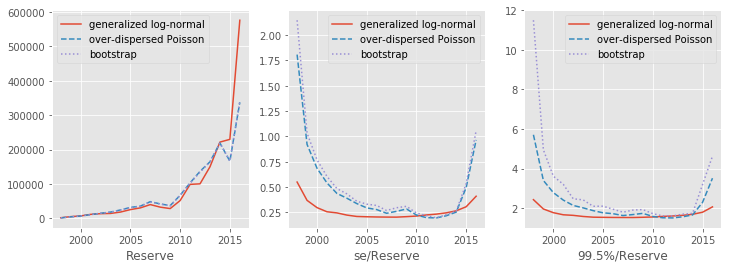

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,4))

res_plot = table.iloc[:-1,:].loc[:,pd.IndexSlice[:,'Reserve']]
res_plot.columns = res_plot.columns.droplevel(level=1)
res_plot.plot(ax=ax[0], style=['-', '--', ':'])
ax[0].set_xlabel('Reserve')

se_res_plot = table.iloc[:-1,:].loc[:,pd.IndexSlice[:,'se/Res']]
se_res_plot.columns = se_res_plot.columns.droplevel(level=1)
se_res_plot.plot(ax=ax[1], style=['-', '--', ':'])
ax[1].set_xlabel('se/Reserve')

q_res_plot = table.iloc[:-1,:].loc[:,pd.IndexSlice[:,'99.5%/Res']]
q_res_plot.columns = q_res_plot.columns.droplevel(level=1)
q_res_plot.plot(ax=ax[2], style=['-', '--', ':'])
ax[2].set_xlabel('99.5%/Reserve')

plt.show()

*Remark: the over-dispersed Poisson results in the paper are based on an incorrect covariance matrix resulting from a (former) bug in the software*

## Recursive distribution forecasting

Next, we replicate the recursive distribution forecasts in Table 4.4.

First for the generalized log-normal model. We set up sub-models dropping the last and two last periods, respectively. (For us, the final period / calendar year is 2016 rather than 20.) We form forecast from both models.

In [15]:
model_l1o = model.sub_model(per_from_to=(None, 2015))
model_l1o.forecast(quantiles=[0.995])
model_l2o = model.sub_model(per_from_to=(None, 2014))
model_l2o.forecast(quantiles=[0.995])

To generate the table, we have to put in a little more work.

In [16]:
gln_full = pd.concat([
    (model.forecasts['Cohort'].iloc[-5:,:][['se_total', 'q_0.995']].T/
     model.forecasts['Cohort'].iloc[-5:,:]['point_forecast']).T,
    (model.forecasts['Total'][['se_total', 'q_0.995']].T/
     model.forecasts['Total']['point_forecast']).T]).rename(
    columns={'point_forecast': 'Reserve', 'se_total': 'se/Res', 'q_0.995' : '99.5%/Res'})
    
gln_l1o = pd.concat([
    (model_l1o.forecasts['Cohort'].iloc[-5:,:][['se_total', 'q_0.995']].T/
     model_l1o.forecasts['Cohort'].iloc[-5:,:]['point_forecast']).T,
    (model_l1o.forecasts['Total'][['se_total', 'q_0.995']].T/
     model_l1o.forecasts['Total']['point_forecast']).T]).rename(
    columns={'point_forecast': 'Reserve', 'se_total': 'se/Res', 'q_0.995' : '99.5%/Res'})

gln_l2o = pd.concat([
    (model_l2o.forecasts['Cohort'].iloc[-5:,:][['se_total', 'q_0.995']].T/
     model_l2o.forecasts['Cohort'].iloc[-5:,:]['point_forecast']).T,
    (model_l2o.forecasts['Total'][['se_total', 'q_0.995']].T/
     model_l2o.forecasts['Total']['point_forecast']).T]).rename(
    columns={'point_forecast': 'Reserve', 'se_total': 'se/Res', 'q_0.995' : '99.5%/Res'})

gln_rec = pd.concat([gln_full.reset_index(), gln_l1o.reset_index(), gln_l2o.reset_index()], 
                    keys=('Full triangle', 'Leave 1 out', 'Leave 2 out'),
                    axis=1)

And with that, we have the generalized log-normal bit of the table.

In [17]:
gln_rec.round(2)

Full triangle                  Leave 1 out                  Leave 2 out  \
          index se/Res 99.5%/Res       index se/Res 99.5%/Res       index   
0          2012   0.23      1.60        2011   0.23      1.61        2010   
1          2013   0.24      1.64        2012   0.25      1.64        2011   
2          2014   0.26      1.69        2013   0.27      1.69        2012   
3          2015   0.30      1.79        2014   0.31      1.80        2013   
4          2016   0.41      2.06        2015   0.41      2.07        2014   
5         Total   0.16      1.42       Total   0.13      1.33       Total   

                    
  se/Res 99.5%/Res  
0   0.23      1.61  
1   0.25      1.64  
2   0.27      1.69  
3   0.31      1.80  
4   0.41      2.07  
5   0.12      1.31

Next, we do the same for the over-dispersed Poisson model with $t$ forecast.

In [18]:
model_odp_l1o = model_odp.sub_model(per_from_to=(None, 2015))
model_odp_l1o.forecast(quantiles=[0.995])
model_odp_l2o = model_odp.sub_model(per_from_to=(None, 2014))
model_odp_l2o.forecast(quantiles=[0.995])

odp_full = pd.concat([
    (model_odp.forecasts['Cohort'].iloc[-5:,:][['se_total', 'q_0.995']].T/
     model_odp.forecasts['Cohort'].iloc[-5:,:]['point_forecast']).T,
    (model_odp.forecasts['Total'][['se_total', 'q_0.995']].T/
     model_odp.forecasts['Total']['point_forecast']).T]).rename(
    columns={'point_forecast': 'Reserve', 'se_total': 'se/Res', 'q_0.995' : '99.5%/Res'})
    
odp_l1o = pd.concat([
    (model_odp_l1o.forecasts['Cohort'].iloc[-5:,:][['se_total', 'q_0.995']].T/
     model_odp_l1o.forecasts['Cohort'].iloc[-5:,:]['point_forecast']).T,
    (model_odp_l1o.forecasts['Total'][['se_total', 'q_0.995']].T/
     model_odp_l1o.forecasts['Total']['point_forecast']).T]).rename(
    columns={'point_forecast': 'Reserve', 'se_total': 'se/Res', 'q_0.995' : '99.5%/Res'})

odp_l2o = pd.concat([
    (model_odp_l2o.forecasts['Cohort'].iloc[-5:,:][['se_total', 'q_0.995']].T/
     model_odp_l2o.forecasts['Cohort'].iloc[-5:,:]['point_forecast']).T,
    (model_odp_l2o.forecasts['Total'][['se_total', 'q_0.995']].T/
     model_odp_l2o.forecasts['Total']['point_forecast']).T]).rename(
    columns={'point_forecast': 'Reserve', 'se_total': 'se/Res', 'q_0.995' : '99.5%/Res'})

odp_rec = pd.concat([odp_full.reset_index(), odp_l1o.reset_index(), odp_l2o.reset_index()], 
                    keys=('Full triangle', 'Leave 1 out', 'Leave 2 out'),
                    axis=1)

In [19]:
odp_rec.round(2)

Full triangle                  Leave 1 out                  Leave 2 out  \
          index se/Res 99.5%/Res       index se/Res 99.5%/Res       index   
0          2012   0.19      1.51        2011   0.20      1.53        2010   
1          2013   0.22      1.56        2012   0.22      1.56        2011   
2          2014   0.25      1.66        2013   0.28      1.74        2012   
3          2015   0.49      2.29        2014   0.48      2.25        2013   
4          2016   0.96      3.51        2015   1.40      4.65        2014   
5         Total   0.24      1.62       Total   0.21      1.54       Total   

                    
  se/Res 99.5%/Res  
0   0.22      1.58  
1   0.24      1.62  
2   0.28      1.72  
3   0.48      2.25  
4   1.53      4.99  
5   0.20      1.53

Finally, we replicate the bootstrap part of the table. For this, we don't generate a sub-model but rather turn the data of the sub-models from above into run-off triangles. We then feed these to the bootstrap function.

In [20]:
data_l1o = model._vector_to_array(model_l1o.data_vector['response'], space='CA')
data_l2o = model._vector_to_array(model_l2o.data_vector['response'], space='CA')

fc_bootstrap_l1o = apc.bootstrap_forecast(data_l1o, quantiles=[0.995], seed=2)
fc_bootstrap_l2o = apc.bootstrap_forecast(data_l2o, quantiles=[0.995], seed=3)

bootstrap_full = pd.concat([
    (fc_bootstrap['Cohort'].iloc[-5:,:][['std', '99.5%']].T/
     fc_bootstrap['Cohort'].iloc[-5:,:]['mean']).T,
    (fc_bootstrap['Total'][['std', '99.5%']].T/
     fc_bootstrap['Total']['mean']).T]).rename(
    columns={'mean': 'Reserve', 'std': 'se/Res', '99.5%' : '99.5%/Res'})
    
bootstrap_l1o = pd.concat([
    (fc_bootstrap_l1o['Cohort'].iloc[-5:,:][['std', '99.5%']].T/
     fc_bootstrap_l1o['Cohort'].iloc[-5:,:]['mean']).T,
    (fc_bootstrap_l1o['Total'][['std', '99.5%']].T/
     fc_bootstrap_l1o['Total']['mean']).T]).rename(
    columns={'mean': 'Reserve', 'std': 'se/Res', '99.5%' : '99.5%/Res'})

bootstrap_l2o = pd.concat([
    (fc_bootstrap_l2o['Cohort'].iloc[-5:,:][['std', '99.5%']].T/
     fc_bootstrap_l2o['Cohort'].iloc[-5:,:]['mean']).T,
    (fc_bootstrap_l2o['Total'][['std', '99.5%']].T/
     fc_bootstrap_l2o['Total']['mean']).T]).rename(
    columns={'mean': 'Reserve', 'std': 'se/Res', '99.5%' : '99.5%/Res'})

bootstrap_rec = pd.concat([bootstrap_full.reset_index(), bootstrap_l1o.reset_index(), 
                           bootstrap_l2o.reset_index()], 
                    keys=('Full triangle', 'Leave 1 out', 'Leave 2 out'),
                    axis=1)

In [21]:
bootstrap_rec.round(2)

Full triangle                  Leave 1 out                  Leave 2 out  \
          index se/Res 99.5%/Res       index se/Res 99.5%/Res       index   
0          2012   0.20      1.61        2011   0.21      1.70        2010   
1          2013   0.23      1.70        2012   0.22      1.67        2011   
2          2014   0.26      1.74        2013   0.30      1.89        2012   
3          2015   0.53      3.19        2014   0.49      2.56        2013   
4          2016   1.06      4.63        2015   1.34      5.91        2014   
5         Total   0.26      1.89       Total   0.22      1.69       Total   

                    
  se/Res 99.5%/Res  
0   0.23      1.73  
1   0.25      1.80  
2   0.29      1.87  
3   0.49      2.43  
4   1.78      8.36  
5   0.23      1.86

## Model Selection

Harnau (2018a) proposed misspecification tests for over-dispersed Poisson and log-normal chain-ladder models. Kuang and Nielsen (2018) expand these tests to generalized log-normal chain-ladder models. We apply those to generalized log-normal and over-dispersed Poisson models without period / calendar effect.

First, we set up sub-models corresponding to the splits into sub-samples.

In [22]:
split_a = [model.sub_model(coh_from_to=(None, 2002)),
           model.sub_model(coh_from_to=(2003, None))]

split_b = [model.sub_model(per_from_to=(None, 2006)),
           model.sub_model(coh_from_to=(None, 2006), per_from_to=(2007, None)),
           model.sub_model(coh_from_to=(2007, None))]

split_c = [model.sub_model(per_from_to=(None, 2010)),
           model.sub_model(per_from_to=(2011, None))]

Then, we run the tests.

In [23]:
bartlett_a, f_a = apc.bartlett_test(split_a), apc.f_test(model, split_a)
bartlett_b, f_b = apc.bartlett_test(split_b), apc.f_test(model, split_b)
bartlett_c, f_c = apc.bartlett_test(split_c), apc.f_test(model, split_c)

Finally, we display the results.

In [24]:
print('Split (a)')
print('---------')
print('LR/C (p): {:.2f} ({:.3f})'.format(bartlett_a['B'], bartlett_a['p_value']))
print('F (p): {:.2f} ({:.3f})\n'.format(f_a['F_stat'], f_a['p_value']))

print('Split (b)')
print('---------')
print('LR/C (p): {:.2f} ({:.3f})'.format(bartlett_b['B'], bartlett_b['p_value']))
print('F (p): {:.2f} ({:.3f})\n'.format(f_b['F_stat'], f_b['p_value']))

print('Split (c)')
print('---------')
print('LR/C (p): {:.2f} ({:.3f})'.format(bartlett_c['B'], bartlett_c['p_value']))
print('F (p): {:.2f} ({:.3f})'.format(f_c['F_stat'], f_c['p_value']))

Split (a)
---------
LR/C (p): 6.29 (0.012)
F (p): 5.50 (0.000)

Split (b)
---------
LR/C (p): 4.70 (0.095)
F (p): 4.48 (0.000)

Split (c)
---------
LR/C (p): 1.12 (0.291)
F (p): 3.08 (0.000)


While the Bartlett tests for common dispersion do not look too discouraging given that we conducted 6 tests, the $F$-tests tell us that estimating linear predictors across the array may not be a good idea.

*Remark: the results for the $F$-tests currently differ from those in the paper.*

We can repeat the process for the over-dispersed Poisson model.

In [25]:
split_odp_a = [model_odp.sub_model(coh_from_to=(None, 2002)),
               model_odp.sub_model(coh_from_to=(2003, None))]

split_odp_b = [model_odp.sub_model(per_from_to=(None, 2006)),
               model_odp.sub_model(coh_from_to=(None, 2006), per_from_to=(2007, None)),
               model_odp.sub_model(coh_from_to=(2007, None))]

split_odp_c = [model_odp.sub_model(per_from_to=(None, 2010)),
               model_odp.sub_model(per_from_to=(2011, None))]

bartlett_odp_a, f_odp_a = apc.bartlett_test(split_odp_a), apc.f_test(model_odp, split_odp_a)
bartlett_odp_b, f_odp_b = apc.bartlett_test(split_odp_b), apc.f_test(model_odp, split_odp_b)
bartlett_odp_c, f_odp_c = apc.bartlett_test(split_odp_c), apc.f_test(model_odp, split_odp_c)

print('Split (a)')
print('---------')
print('LR/C (p): {:.2f} ({:.3f})'.format(bartlett_odp_a['B'], bartlett_odp_a['p_value']))
print('F (p): {:.2f} ({:.3f})\n'.format(f_odp_a['F_stat'], f_odp_a['p_value']))

print('Split (b)')
print('---------')
print('LR/C (p): {:.2f} ({:.3f})'.format(bartlett_odp_b['B'], bartlett_odp_b['p_value']))
print('F (p): {:.2f} ({:.3f})\n'.format(f_odp_b['F_stat'], f_odp_b['p_value']))

print('Split (c)')
print('---------')
print('LR/C (p): {:.2f} ({:.3f})'.format(bartlett_odp_c['B'], bartlett_odp_c['p_value']))
print('F (p): {:.2f} ({:.3f})'.format(f_odp_c['F_stat'], f_odp_c['p_value']))

Split (a)
---------
LR/C (p): 11.68 (0.001)
F (p): 6.63 (0.000)

Split (b)
---------
LR/C (p): 11.63 (0.003)
F (p): 6.03 (0.000)

Split (c)
---------
LR/C (p): 15.07 (0.000)
F (p): 2.50 (0.000)


In this case, the tests tell us that an over-dispersed Poisson model may not be appropriate for the data.

*Remark: the results for the $F$-tests currently differ from those in the paper.*

### R-test for generalized log-normal vs over-dispersed Poisson (not in paper)

Harnau (2018b) recently proposed a direct test between generalized log-normal and over-dispersed Poisson models.

First, we consider the hypothesis

$$ H_0: \text{extended generalized log-normal} \quad \text{vs} \quad H_A: \text{extended over-dispersed Poisson}$$

where extended indicates a model with calendar effect.

In [26]:
r_test_gln = apc.r_test(apc.loss_KN(), family_null='gen_log_normal_response', data_format='CL')

print('p-value: {:.4f}'.format(r_test_gln['p_value']))

p-value: 0.0000


This model is rejected. Thus, we consider the opposite hypothesis

$$ H_0: \text{extended over-dispersed Poisson} \quad \text{vs} \quad H_A: \text{extended generalized log-normal}$$

In [27]:
r_test_odp = apc.r_test(apc.loss_KN(), family_null='od_poisson_response', data_format='CL')

print('p-value: {:.4f}'.format(r_test_odp['p_value']))

p-value: 0.5771


This hypothesis cannot be rejected. 

We consider the same tests, but this time without a calendar effect. We start with

$$ H_0: \text{generalized log-normal} \quad \text{vs} \quad H_A: \text{over-dispersed Poisson}$$

In [28]:
r_test_gln_ac = apc.r_test(apc.loss_KN(), family_null='gen_log_normal_response', 
                            predictor='AC', data_format='CL')

print('p-value: {:.4f}'.format(r_test_gln_ac['p_value']))

p-value: 0.0000


This model is still rejected. We test for 

$$ H_0: \text{over-dispersed Poisson} \quad \text{vs} \quad H_A: \text{generalized log-normal}$$

In [29]:
r_test_odp_ac = apc.r_test(apc.loss_KN(), family_null='od_poisson_response', 
                           predictor='AC', data_format='CL')

print('p-value: {:.4f}'.format(r_test_odp_ac['p_value']))

p-value: 0.0674


While not rejected, this is a much closer call than the test result for the same hypothesis but with calendar effect.

This leaves us with a question what to do. Certainly, the $R$-tests tell us to be cautious about the generalized log-normal model, both with and without period / calendar effect. 
However, and over-dispersed Poisson model, at least without calendar effect, is flagged by he misspecification tests from above. It may be the case that the data require a somewhat richer modeling approach.

# References

* England, P., & Verrall, R. (1999). Analytic and bootstrap estimates of prediction errors in claims reserving. *Insurance: Mathematics and Economics*, 25(3), 281–293. 
* England, P. D. (2002). Addendum to “Analytic and bootstrap estimates of prediction errors in claims reserving.” *Insurance: Mathematics and Economics*, 31(3), 461–466. 
* Harnau, J., & Nielsen, B. (2017). Over-dispersed age-period-cohort models. *Journal of the American Statistical Association.* [Available online](https://doi.org/10.1080/01621459.2017.1366908)
* Harnau, J. (2018a). Misspecification Tests for Log-Normal and Over-Dispersed Poisson Chain-Ladder Models. *Risks*, 6(2), 25. [Open Access](https://doi.org/10.3390/RISKS6020025)
* Harnau, J. (2018b). Log-Normal or Over-Dispersed Poisson? *Risks*, 6(3), 70. [Open Access](https://doi.org/10.3390/RISKS6030070)
* Kuang, D., & Nielsen, B. (2018). Generalized Log-Normal Chain-Ladder. *ArXiv E-Prints*, 1806.05939. [Open Access](http://arxiv.org/abs/1806.05939)